In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv('country.csv')

In [4]:
print(df.head())

            country  child_mort  exports  health  imports  income  inflation  \
0          Mongolia        26.1     46.7    5.44     56.7    7710      39.20   
1             Sudan        76.7     19.7    6.32     17.2    3370      19.60   
2            Malawi        90.5     22.8    6.59     34.9    1030      12.10   
3           Belgium         4.5     76.4   10.70     74.7   41100       1.88   
4  Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609      20.80   

   life_expec  total_fer   gdpp  
0        66.2       2.64   2650  
1        66.3       4.88   1480  
2        53.1       5.31    459  
3        80.0       1.86  44400  
4        57.5       6.54    334  


In [5]:
# Drop the 'country' column for clustering
X = df.drop('country', axis=1)

In [6]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

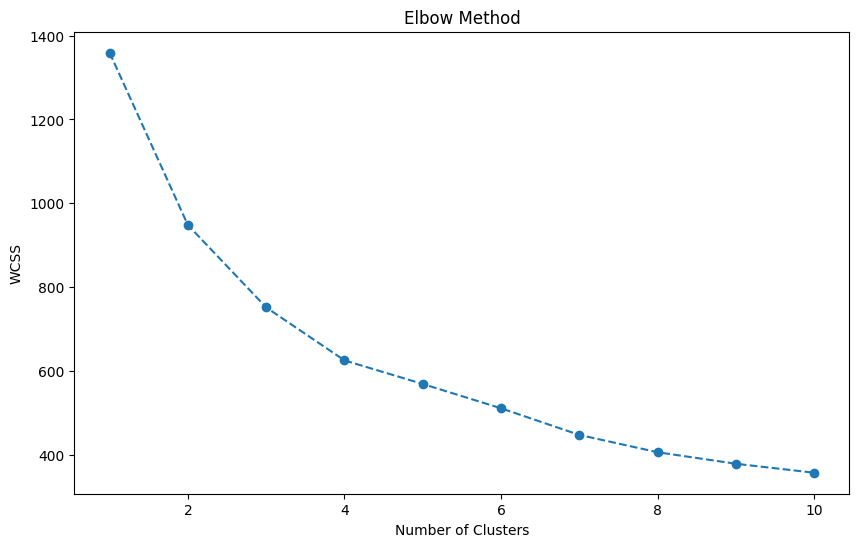

In [7]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [11]:
# Apply K-means clustering with the chosen number of clusters
optimal_clusters = 3  # Chosen based on Elbow method and Silhouette score
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster_KMeans'] = clusters_kmeans


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


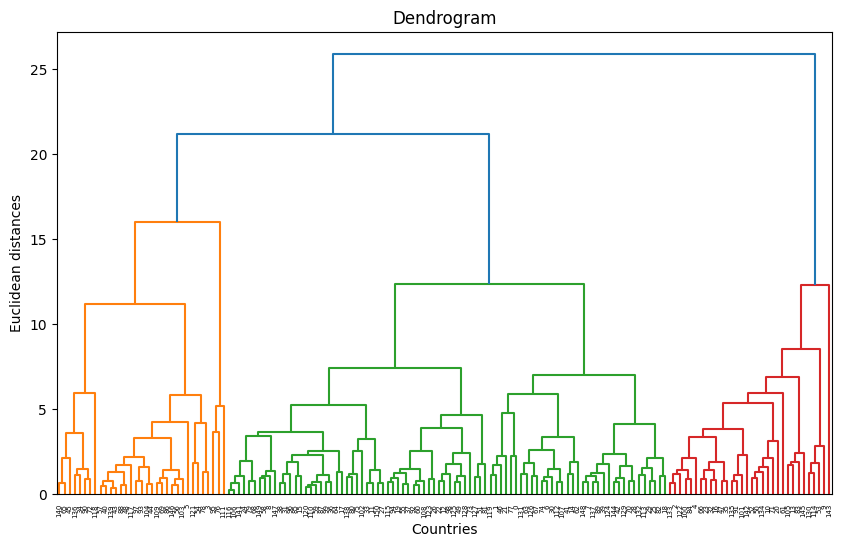

In [12]:
# Plot the Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Apply Hierarchical clustering with the chosen number of clusters
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
clusters_hierarchical = hierarchical.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster_Hierarchical'] = clusters_hierarchical

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

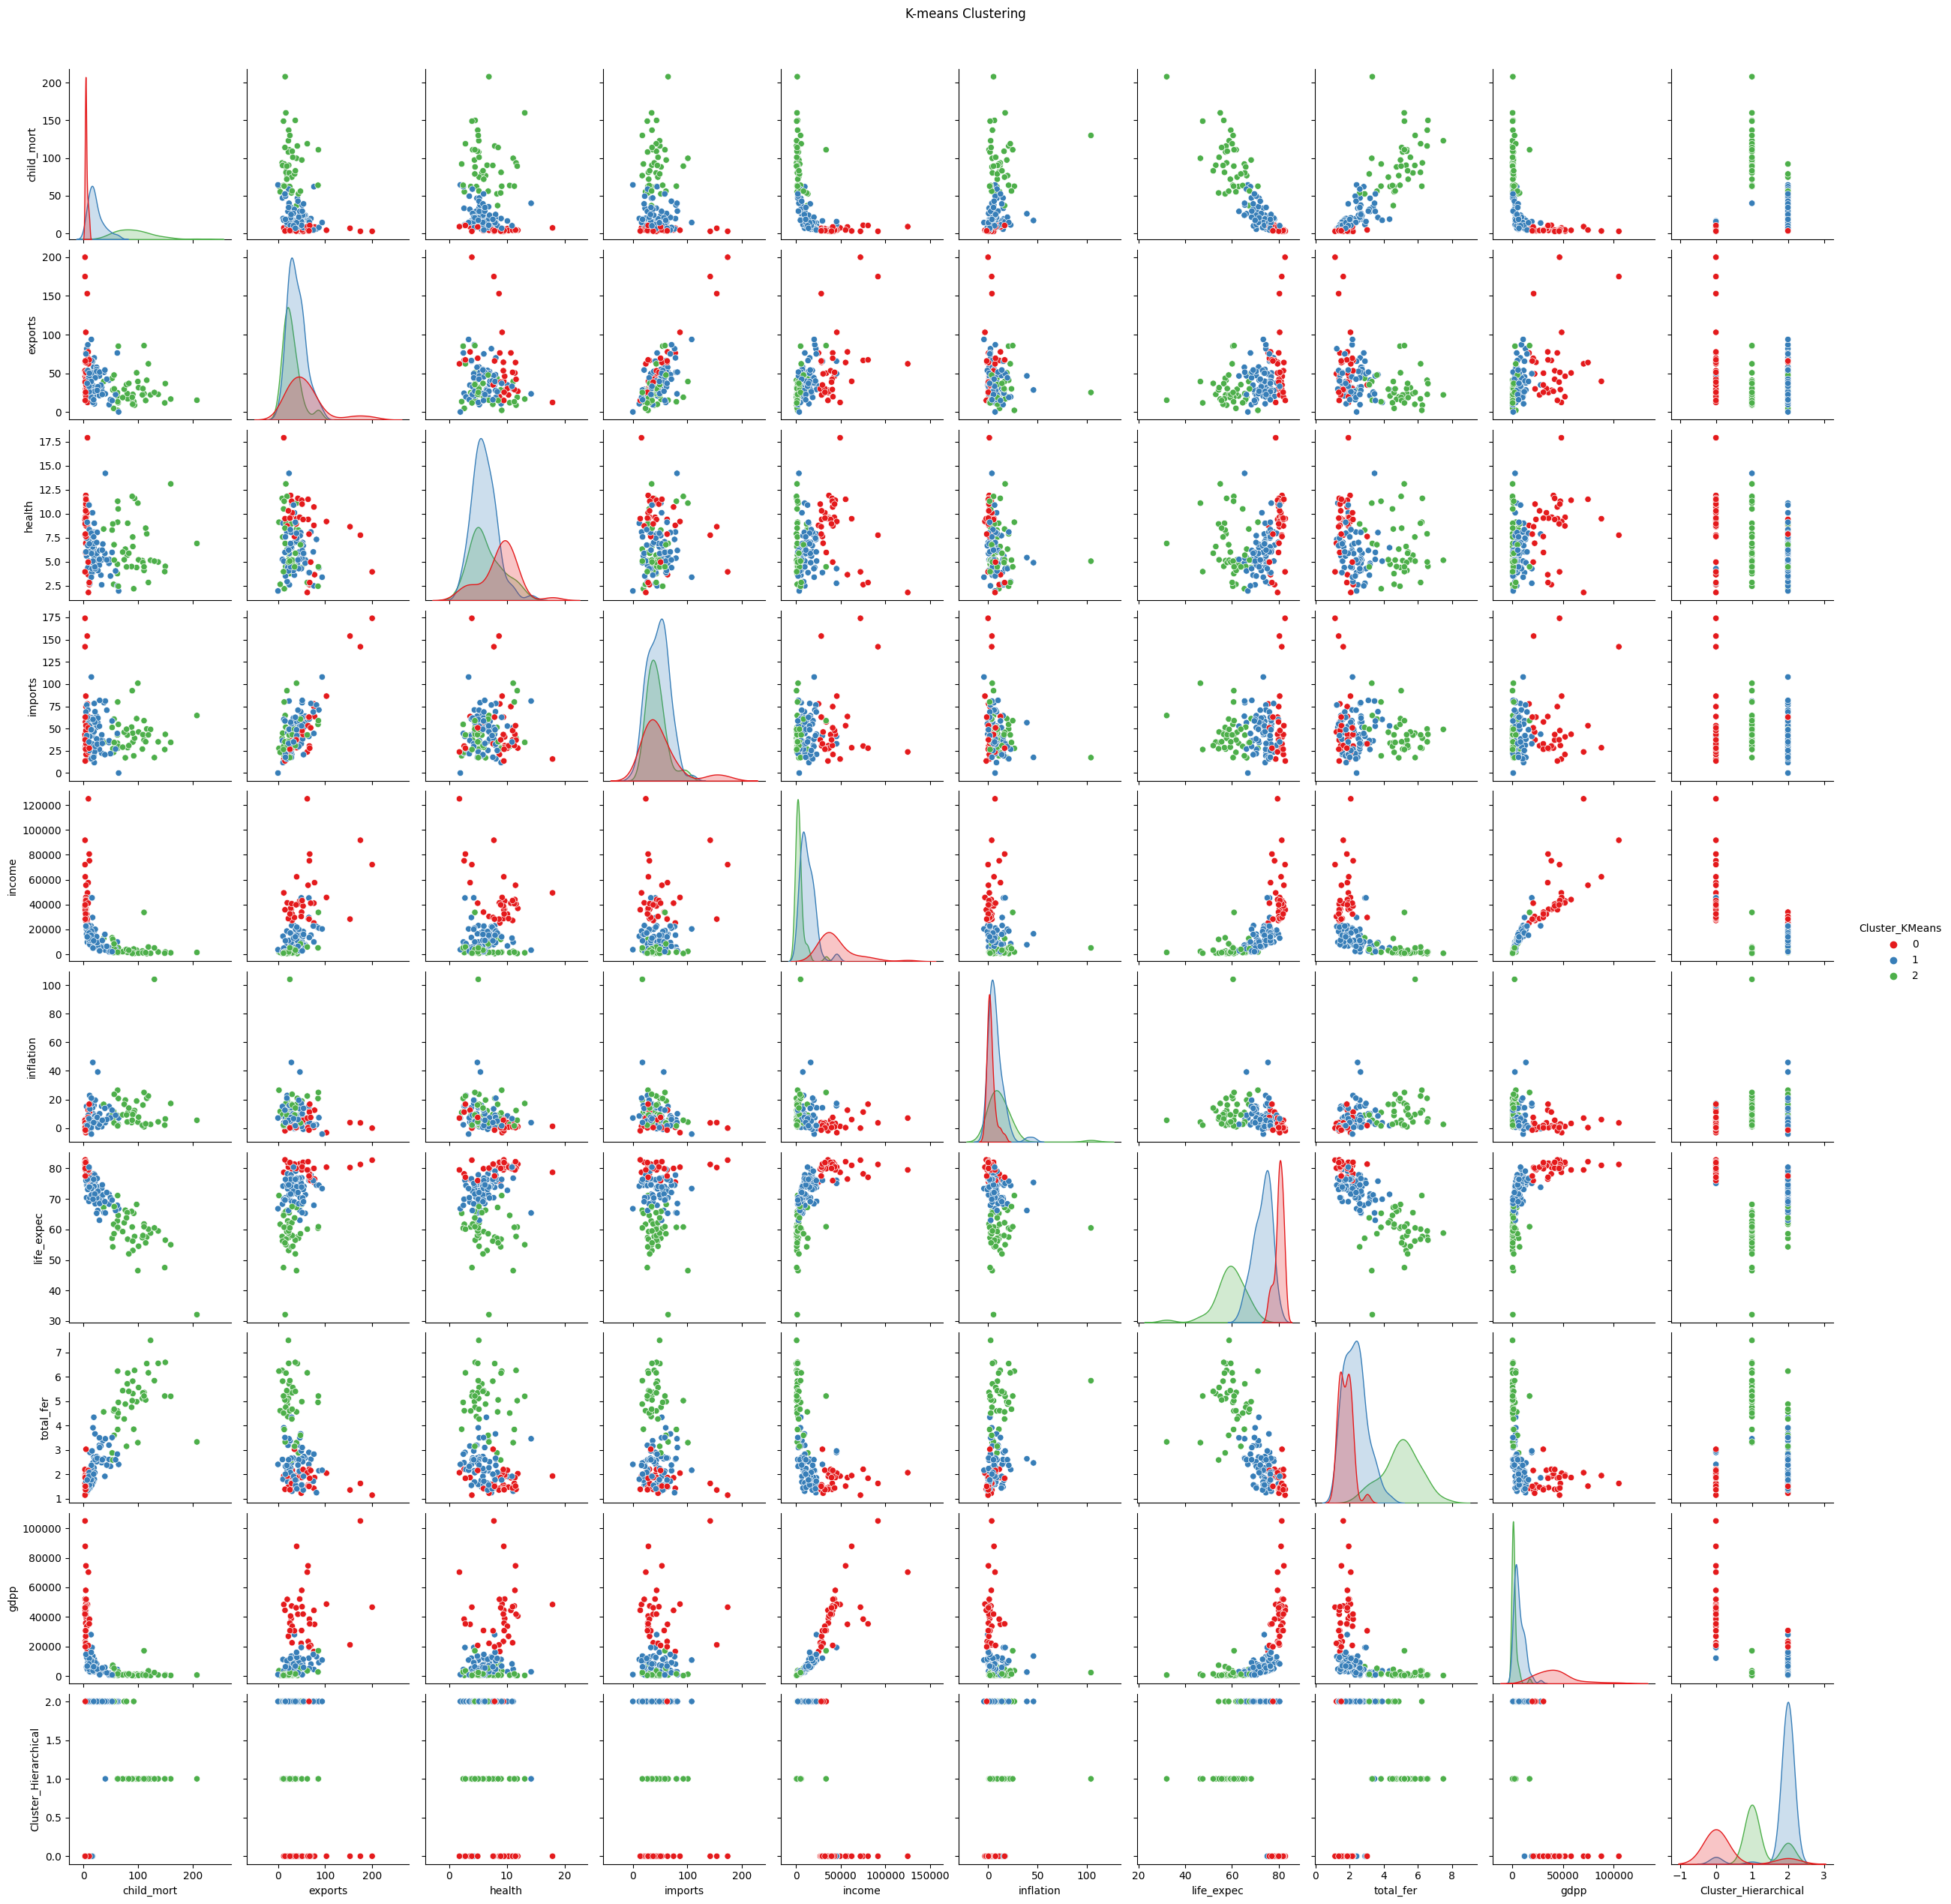

In [16]:
# Visualize the clusters using pairplot for K-means
sns.pairplot(df, hue='Cluster_KMeans', palette='Set1', diag_kind='kde')
plt.suptitle('K-means Clustering', y=1.02)
plt.show()




C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

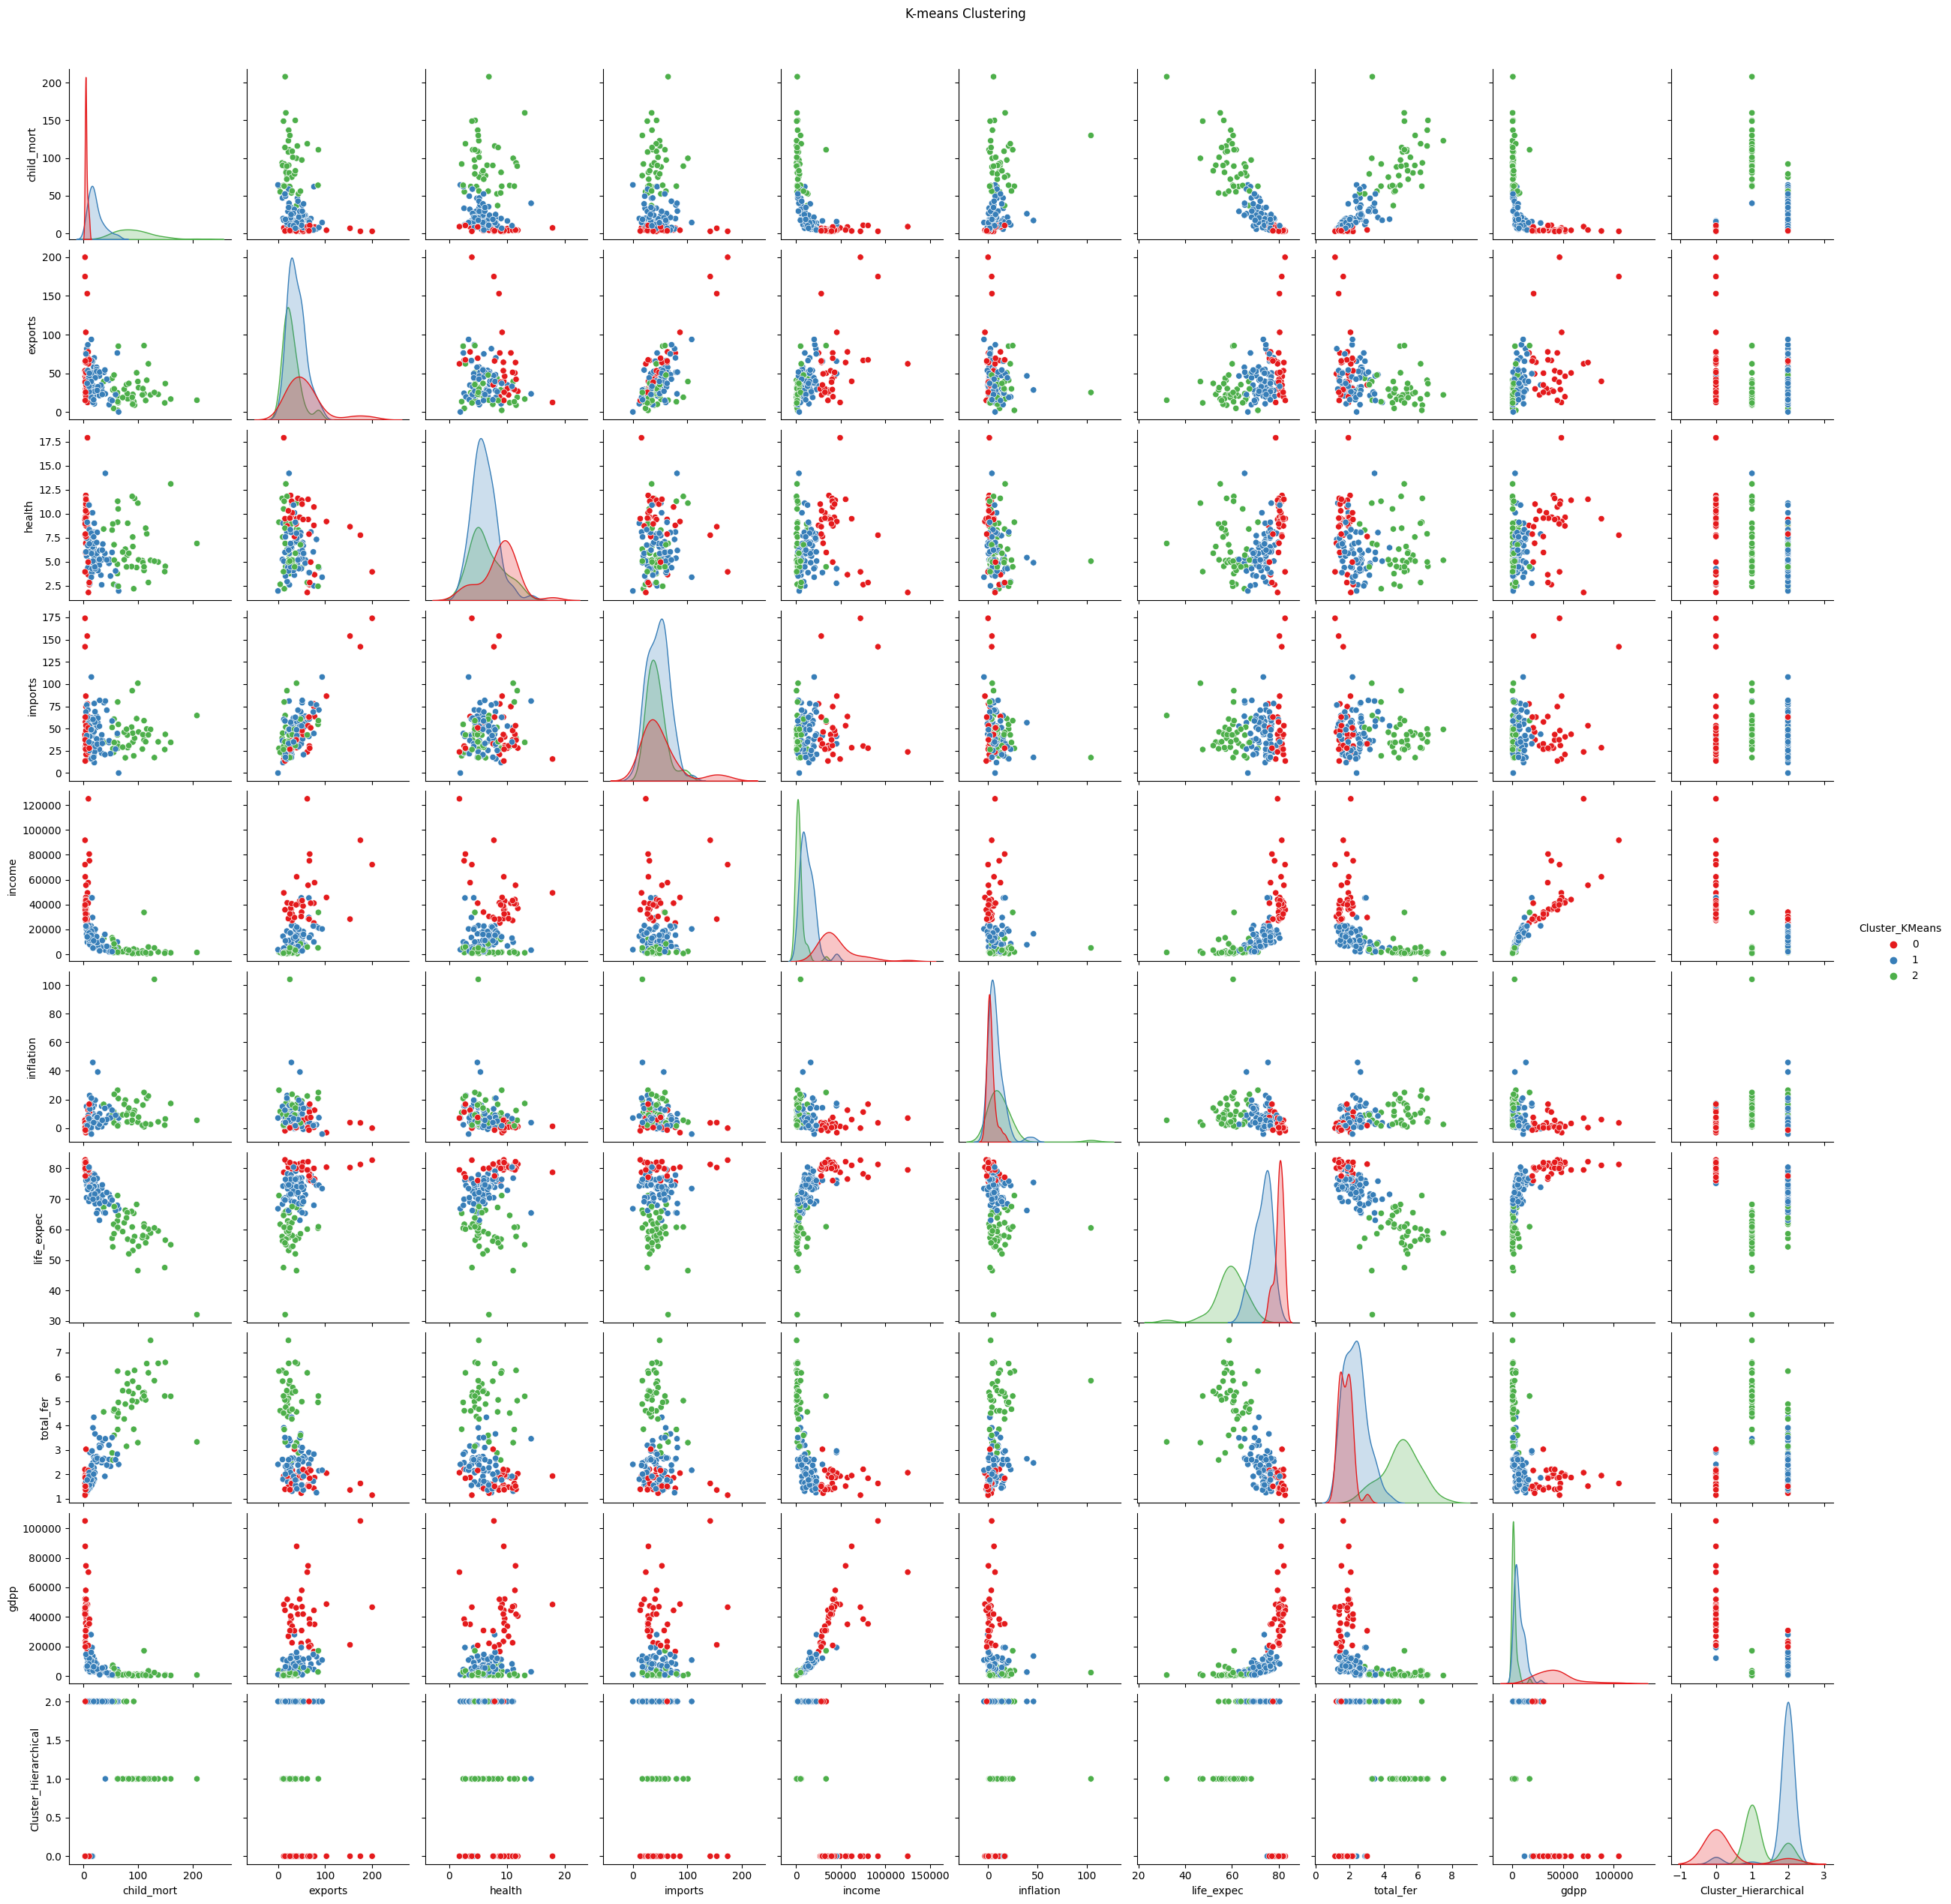

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

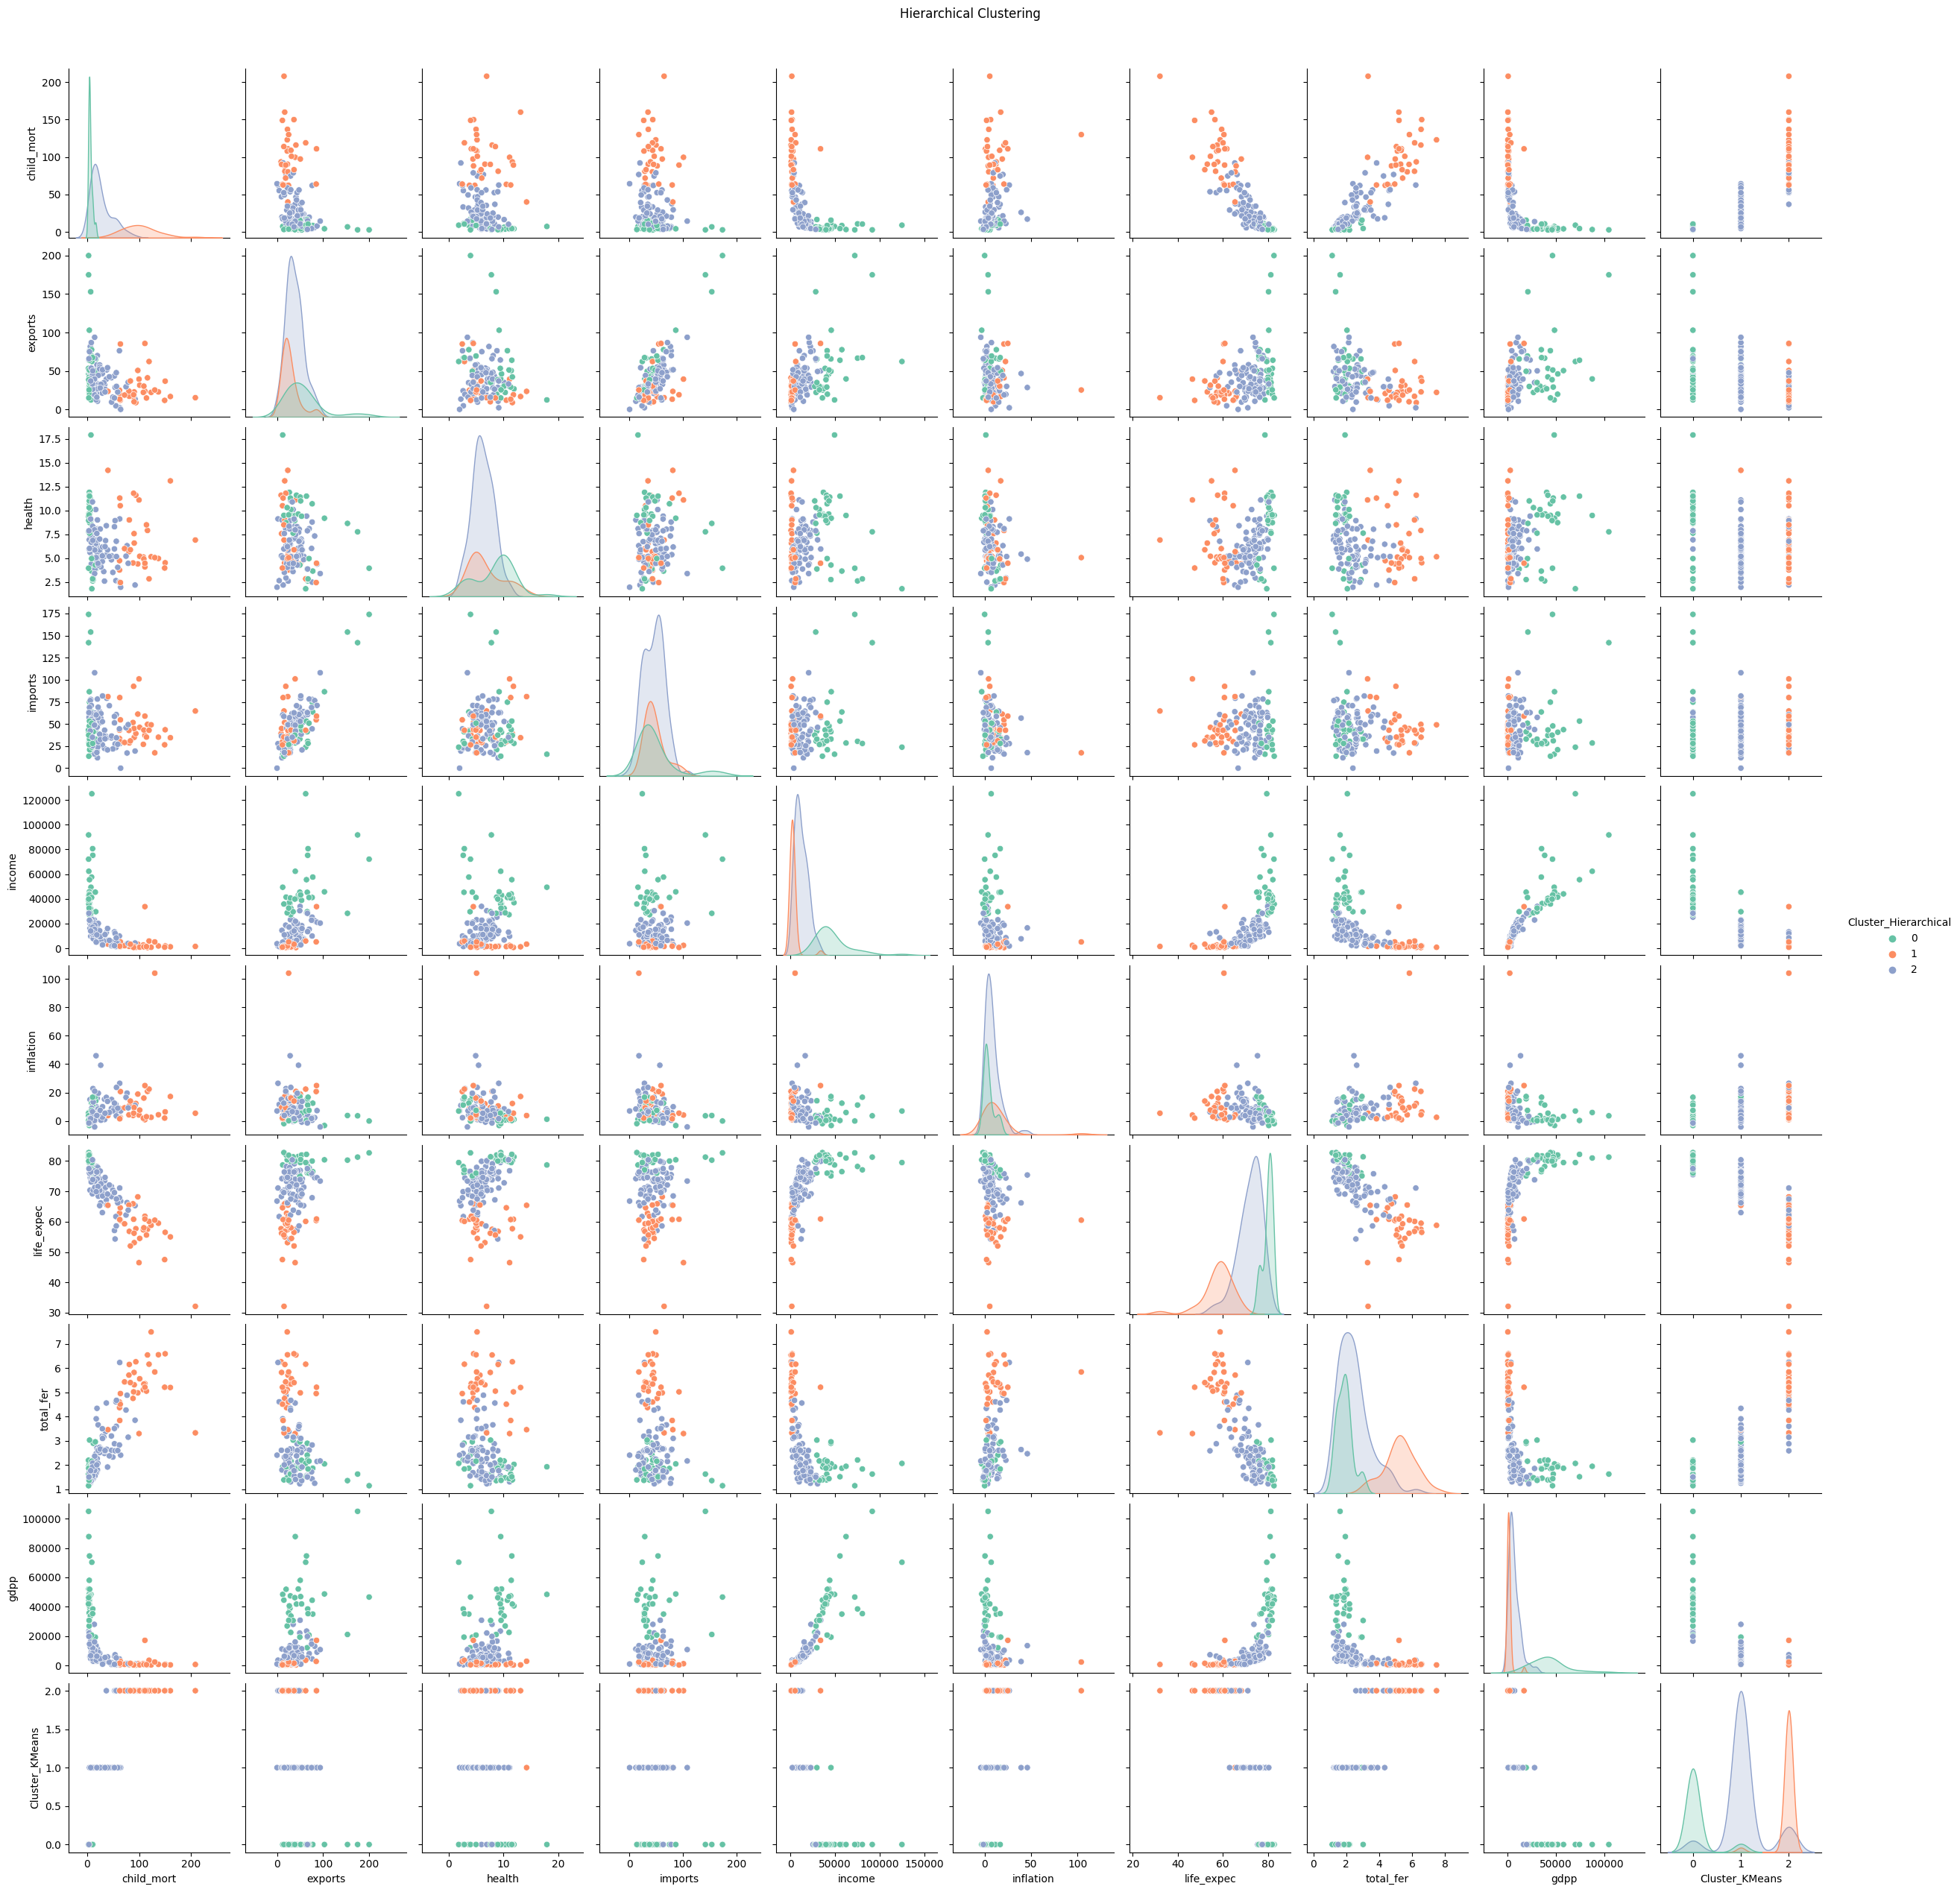

              country  child_mort  exports  health  imports  income  \
0            Mongolia        26.1     46.7    5.44     56.7    7710   
1               Sudan        76.7     19.7    6.32     17.2    3370   
2              Malawi        90.5     22.8    6.59     34.9    1030   
3             Belgium         4.5     76.4   10.70     74.7   41100   
4    Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
..                ...         ...      ...     ...      ...     ...   
146           Finland         3.0     38.7    8.95     37.4   39800   
147        Costa Rica        10.2     33.2   10.90     35.0   13000   
148          Colombia        18.6     15.9    7.59     17.8   10900   
149        Montenegro         6.8     37.0    9.11     62.7   14000   
150    Czech Republic         3.4     66.0    7.88     62.9   28300   

     inflation  life_expec  total_fer   gdpp  Cluster_KMeans  \
0       39.200        66.2       2.64   2650               1   
1       19.600     

In [15]:
# Visualize the clusters using pairplot for Hierarchical Clustering
sns.pairplot(df, hue='Cluster_Hierarchical', palette='Set2', diag_kind='kde')
plt.suptitle('Hierarchical Clustering', y=1.02)
plt.show()

# Show the clustered data
print(df)

#### Use PCA to reduce the dimension to 2d

In [20]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add the cluster labels
df_pca['Cluster_KMeans'] = clusters_kmeans
df_pca['Cluster_Hierarchical'] = clusters_hierarchical


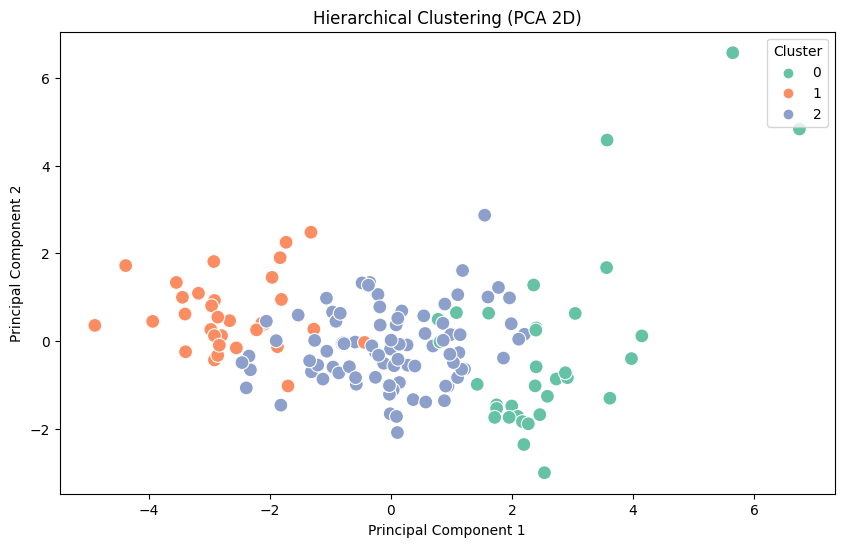

In [21]:
# Visualize the Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_Hierarchical', palette='Set2', s=100)
plt.title('Hierarchical Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


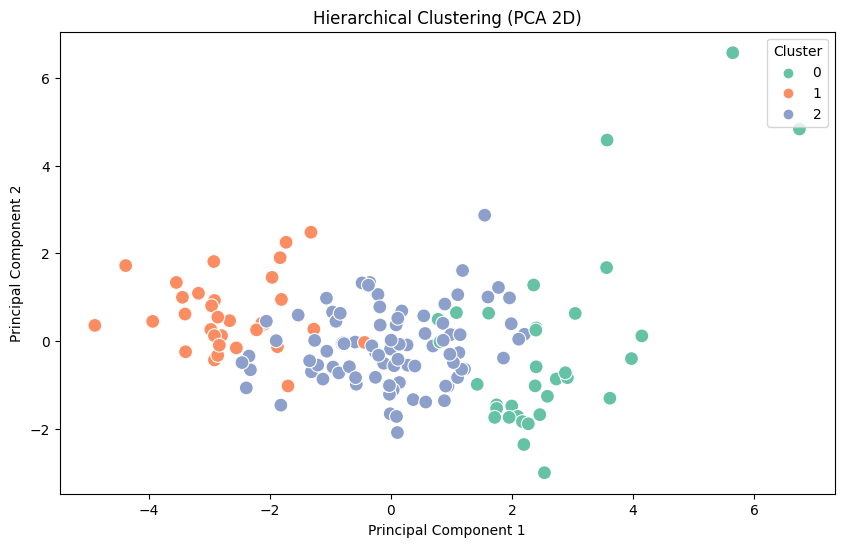

In [22]:
# Visualize the Hierarchical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster_Hierarchical', palette='Set2', s=100)
plt.title('Hierarchical Clustering (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


#### Suggestion to CEO 

Strategic Allocation
Based on the cluster analysis, here is a suggested allocation of the $10 million:

High Development Cluster (Cluster 1): $500,000

Purpose: Knowledge exchange programs, collaborations, and innovative pilot projects that could be scaled in other regions.
Developing Nations with Moderate Challenges (Cluster 2): $3,000,000

Purpose: Healthcare infrastructure improvements, educational initiatives, and economic development programs. Focus on creating sustainable development models.
Low Development and High Needs (Cluster 3): $6,500,000

Purpose: Immediate financial assistance for healthcare, nutrition, and economic empowerment. Implement large-scale projects to address critical needs and improve living conditions.